In [7]:
from mtbs_utils import initialize_gee,display_mtbs_burn_severity
from mtbs_utils import display_mtbs_boundaries,display_mtbs_by_event_id
from mtbs_utils import get_mtbs_properties,get_mtbs_time_series_by_Ig_date
import matplotlib.pyplot as plt

In [8]:
# Call the function to initialize GEE
initialize_gee()

Google Earth Engine initialized successfully.


In [9]:
# Example usage of the function
start_date = '2016-01-01'
end_date = '2021-12-31'
bbox = [-124.4, 32.5, -114.1, 42.0]  # Bounding box for California
event_id = 'CA3983912034520210702'  # Replace with your desired Event ID


In [10]:
# Call the function and display the map
display_mtbs_burn_severity(start_date, end_date, bbox)

Map(center=[37.25, -119.25], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchData…

In [11]:
# Call the function and display the map
display_mtbs_boundaries(bbox,start_date,end_date)

Map(center=[37.25, -119.25], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchData…

In [12]:
# Call the function and display the map
display_mtbs_by_event_id(event_id)

Google Earth Engine initialized successfully.
Displaying feature with Event_ID: CA3983912034520210702


Map(center=[39.93642291484538, -120.17855459031658], controls=(WidgetControl(options=['position', 'transparent…

In [13]:
# Call the function and get the DataFrame
df = get_mtbs_properties(event_id)

df

,Asmnt_Type,BurnBndAc,BurnBndLat,BurnBndLon,Comment,Event_ID,High_T,Ig_Date,IncGreen_T,Incid_Name,...,Map_ID,Map_Prog,Mod_T,NoData_T,Perim_ID,Post_ID,Pre_ID,dNBR_offst,dNBR_stdDv,irwinID
0,Initial,108368,39.957,-120.181,CA3987512036820210703 is a duplicate of this f...,CA3983912034520210702,650,1625209200000,-150,SUGAR,...,10024011,MTBS,450,-970,,804303220210805,804303220200701,44,32,33088F36-F802-4500-86A4-82DA6A62425F


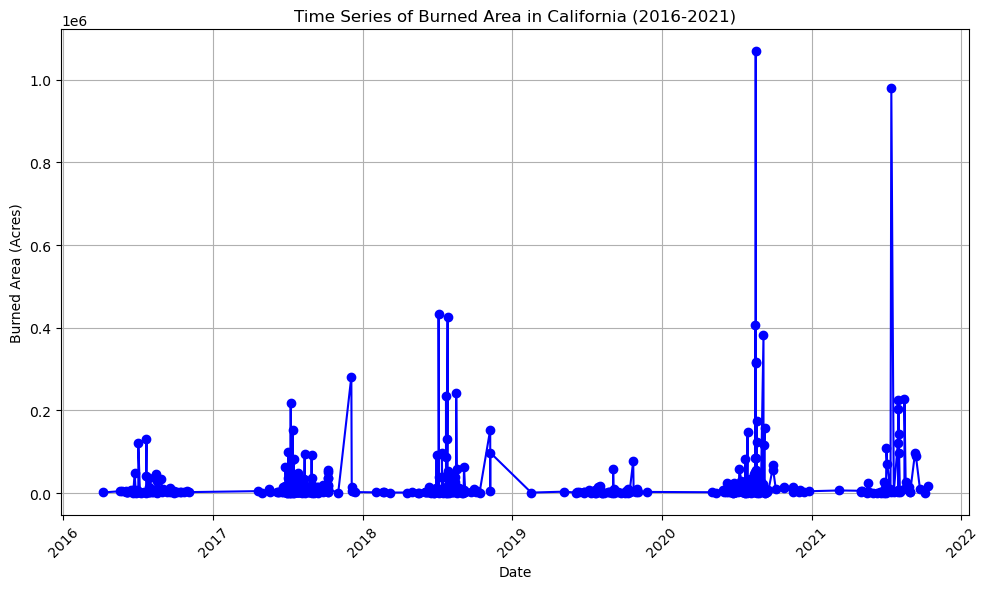

In [14]:
# Get the time series DataFrame
df = get_mtbs_time_series_by_Ig_date(bbox,start_date, end_date)

# Plot the time series
if not df.empty:
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df['BurnBndAc'], marker='o', linestyle='-', color='b')
    plt.title('Time Series of Burned Area in California (2016-2021)')
    plt.xlabel('Date')
    plt.ylabel('Burned Area (Acres)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for the specified AOI and Ig_Date range.")

In [18]:
df

,BurnBndAc,Date
438,1422,2016-04-06
270,4442,2016-05-18
219,3826,2016-05-22
404,1477,2016-06-01
285,5117,2016-06-02
...,...,...
430,97831,2021-09-10
106,89960,2021-09-12
50,9087,2021-09-22
439,1295,2021-10-05


In [20]:

def get_season(month):
    """Returns the season for a given month."""
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Function to plot BurnBndAc by seasonality
def plot_burned_area_by_season(df):
    if df.empty:
        print("No data available to plot.")
        return

    # Add Year and Season columns
    df['Year'] = df['Date'].dt.year
    df['Season'] = df['Date'].dt.month.apply(get_season)

    # Group by Year and Season and sum the burned area
    season_summary = df.groupby(['Year', 'Season'])['BurnBndAc'].sum().reset_index()

    # Pivot for easier plotting
    pivot_df = season_summary.pivot(index='Year', columns='Season', values='BurnBndAc').fillna(0)

    # Plot the data
    pivot_df.plot(kind='bar', stacked=True, figsize=(12, 7))
    plt.title('Burned Area (BurnBndAc) by Season')
    plt.xlabel('Year')
    plt.ylabel('Burned Area (Acres)')
    plt.legend(title='Season')
    plt.tight_layout()
    plt.show()

In [22]:
# Function to plot BurnBndAc by seasonality with side-by-side bars
def plot_burned_area_by_season_side(df):
    if df.empty:
        print("No data available to plot.")
        return

    # Add Year and Season columns
    df['Year'] = df['Date'].dt.year
    df['Season'] = df['Date'].dt.month.apply(get_season)

    # Group by Year and Season and sum the burned area
    season_summary = df.groupby(['Year', 'Season'])['BurnBndAc'].sum().reset_index()

    # Pivot for easier plotting
    pivot_df = season_summary.pivot(index='Year', columns='Season', values='BurnBndAc').fillna(0)

    # Plot side-by-side bars
    pivot_df.plot(kind='bar', figsize=(12, 7), width=0.8)
    plt.title('Burned Area (BurnBndAc) by Season')
    plt.xlabel('Year')
    plt.ylabel('Burned Area (Acres)')
    plt.legend(title='Season')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

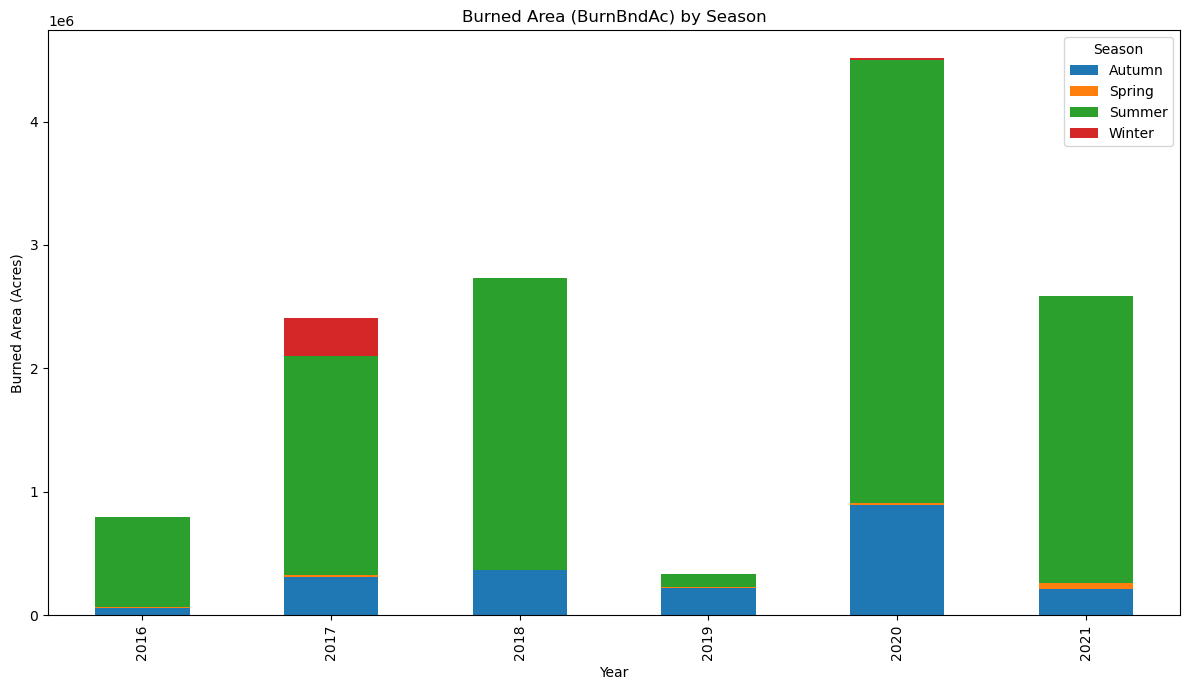

In [21]:
# df = get_mtbs_time_series_by_Ig_date(bbox, start_date, end_date)
plot_burned_area_by_season(df)

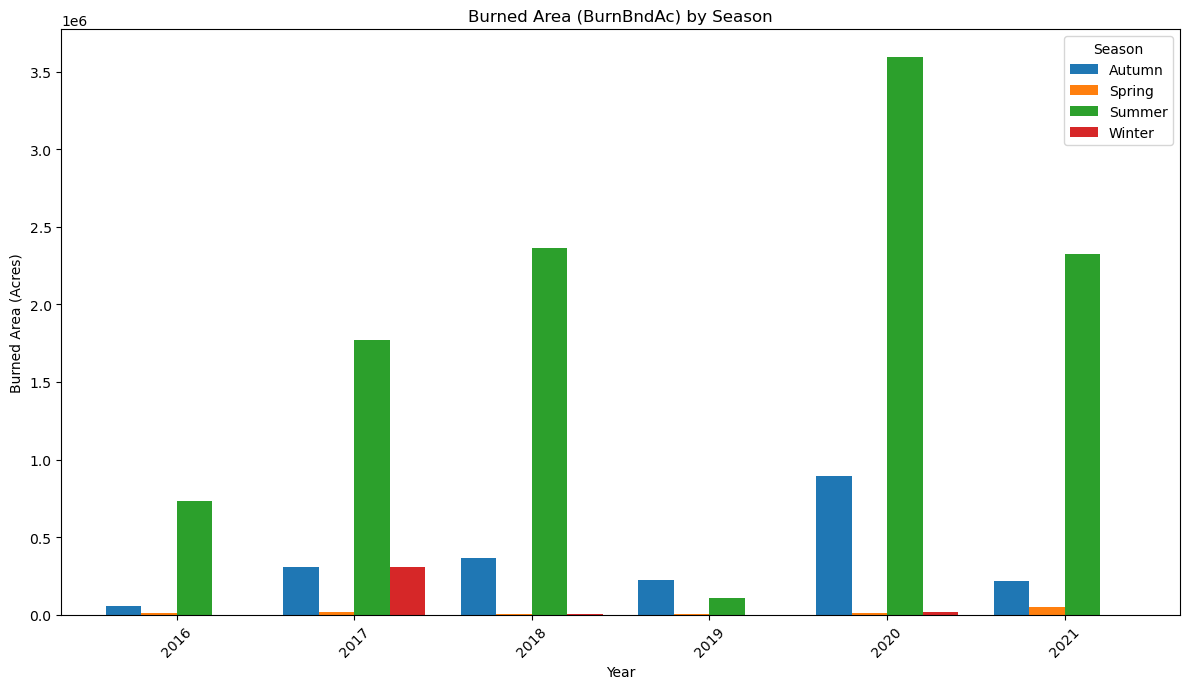

In [23]:
# df = get_mtbs_time_series_by_Ig_date(bbox, start_date, end_date)
plot_burned_area_by_season_side(df)

In [24]:
# Function to plot BurnBndHa_1000 by seasonality with side-by-side bars
def plot_burned_area_by_season_hectars(df):
    if df.empty:
        print("No data available to plot.")
        return
    # Convert BurnBndAc from acres to hectares and then to ha/1000
    df['BurnBndHa'] = (df['BurnBndAc'] * 0.404686) / 1000
    df.rename(columns={'BurnBndHa': 'BurnBndHa_1000'}, inplace=True)

    # Add Year and Season columns
    df['Year'] = df['Date'].dt.year
    df['Season'] = df['Date'].dt.month.apply(get_season)

    # Group by Year and Season and sum the burned area
    season_summary = df.groupby(['Year', 'Season'])['BurnBndHa_1000'].sum().reset_index()

    # Pivot for easier plotting
    pivot_df = season_summary.pivot(index='Year', columns='Season', values='BurnBndHa_1000').fillna(0)

    # Plot side-by-side bars
    pivot_df.plot(kind='bar', figsize=(12, 7), width=0.8)
    plt.title('Burned Area (ha/1000) by Season')
    plt.xlabel('Year')
    plt.ylabel('Burned Area (Thousands of Hectares)')
    plt.legend(title='Season')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

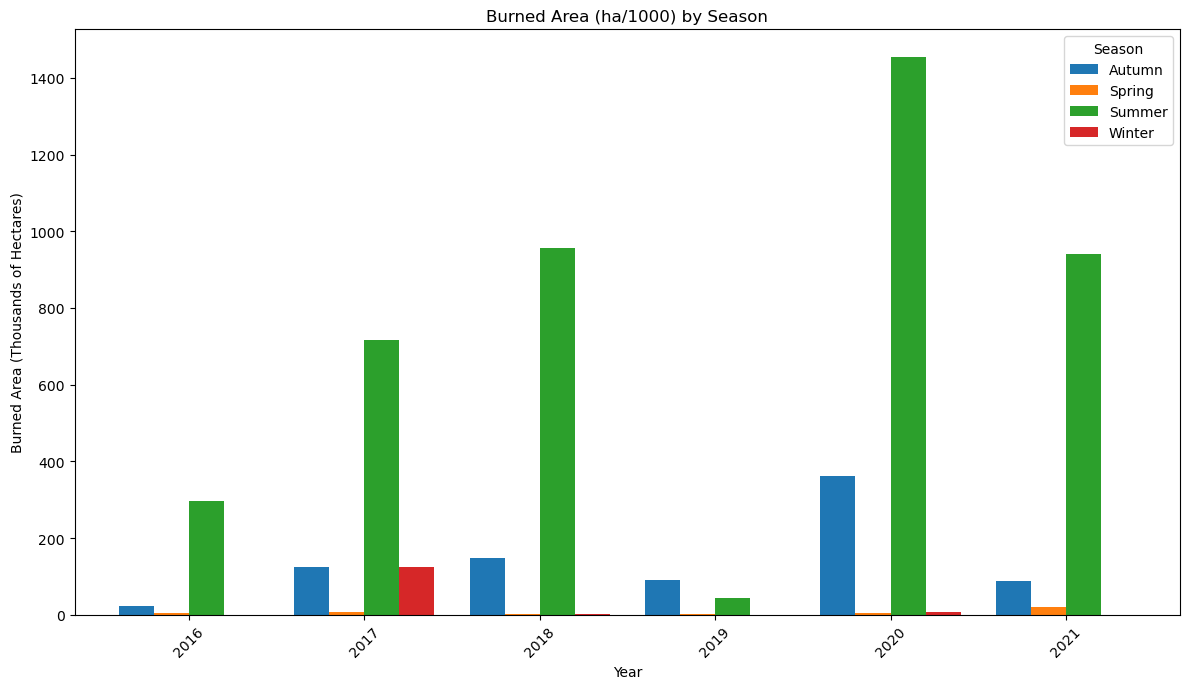

In [25]:
plot_burned_area_by_season_hectars(df)